# Introduction to Information Theory

## Exercise 1

(entropy, implementation)

Consider two fair dice with 6 sides each.

1. Print the probability distribution of the sum $S$ of the numbers obtained by throwing the two dice.
1. What is the information content in bits of the events $S=2$, $S=11$, $S=5$, $S=7$.
1. Calculate the entropy of S.
1. Lets say you throw the die one at a time, and the first die shows 4. What is the entropy of S after this observation? Was any information gained/lost in the process of observing the outcome of the first die toss? If so, calculate how much information (in bits) was lost or gained.

Information content for S value 2: 5.169925001442312 bits
Information content for S value 11: 4.169925001442312 bits
Information content for S value 5: 3.169925001442312 bits
Information content for S value 7: 2.584962500721156 bits
Entropy of S: 3.2744019192887706
New entropy: 2.584962500721156
Information gain: 0.6894394185676145 bits


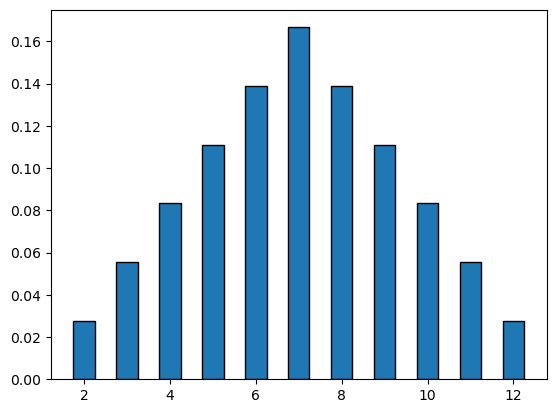

In [4]:
import math
import matplotlib.pyplot as plt

# 1.

distribution = [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]
sums = list(range(2, 13))

plt.bar(sums, distribution, width = 0.5, edgecolor='black')

# 2.
for S in [2, 11, 5, 7]:
    print(f'Information content for S value {S}: {math.log2(1/distribution[S - 2])} bits')

# 3.
entropy = sum([prob * math.log2(1/prob) for prob in distribution])
print(f'Entropy of S: {entropy}')

distribution_first_4 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

new_entropy = sum([prob * math.log2(1/prob) for prob in distribution_first_4])

print(f'New entropy: {new_entropy}')
print(f'Information gain: {entropy - new_entropy} bits')

## Exercise 2

(information gain, implementation or analysis)

Given the dataset below, calculate the information gain for the target variable 'Edible' and each feature ('Weight', 'Smell', 'Spots', 'Smooth'):

In [13]:
import pandas as pd
features = ['Weight', 'Smell', 'Spots', 'Smooth', 'Edible']
mushrooms = pd.DataFrame([
  (1, 0, 0, 0, 1),
  (1, 0, 1, 0, 1),
  (0, 1, 0, 1, 1),
  (0, 0, 0, 1, 0),
  (1, 1, 1, 0, 0),
  (1, 0, 1, 1, 0),
  (1, 0, 0, 1, 0),
  (0, 1, 0, 0, 0)
],
index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
columns=features)
print(mushrooms)

   Weight  Smell  Spots  Smooth  Edible
A       1      0      0       0       1
B       1      0      1       0       1
C       0      1      0       1       1
D       0      0      0       1       0
E       1      1      1       0       0
F       1      0      1       1       0
G       1      0      0       1       0
H       0      1      0       0       0


## Exercise 3

(entropy and information gain, implementation or analysis)

The following code simulates the season results for football team F:

In [14]:
from itertools import product
import pandas as pd
import random
random.seed(1)
opponents = ['Team '+chr(ord('A') + i) for i in range(5)]
stadiums = ['Home', 'Away']
games = pd.DataFrame(list(product(opponents, stadiums))*2,
                     columns=['opponent', 'stadium'])
total_games = len(games)
games['result'] = random.choices(["Win", "Loss", "Draw"],
                                 k=total_games)
# print(games)

# sorry
entropy_result = sum([games['result'].str.contains(result).sum() / games['result'].__len__() * -math.log2(games['result'].str.contains(result).sum() / games['result'].__len__()) for result in ["Win", "Loss", "Draw"]])

print(f'H(result) = {entropy_result}')

home_games = games.loc[games['stadium'] == 'Home']
away_games = games.loc[games['stadium'] == 'Away']

counts = home_games['result'].value_counts()
home_games_entropy = sum([-math.log2(count / len(home_games)) * (count / len(home_games)) for count in counts])

counts = away_games['result'].value_counts()
away_games_entropy = sum([-math.log2(count / len(away_games)) * (count / len(away_games)) for count in counts])

probability_home = len(home_games) / total_games
probability_away = len(away_games) / total_games
avg_entropy_stadium = probability_home * home_games_entropy + probability_away * away_games_entropy

print(f'1)\nH(result|stadium) = {avg_entropy_stadium}')

def calc_entropy_opponent(opponent):
    opponent_games = games.loc[games['opponent'] == opponent]
    counts = opponent_games['result'].value_counts()
    entropy = sum([-math.log2(count / len(opponent_games)) * (count / len(opponent_games)) for count in counts])
    return entropy

opponents_entropies = pd.DataFrame([calc_entropy_opponent(opponent) for opponent in opponents], columns=["entropy"])
opponents_entropies['probabilities'] = [len(games.loc[games['opponent'] == opponent]) / total_games for opponent in opponents]

# print(opponents_entropies)

avg_entropy_opponents = sum(opponents_entropies['entropy'] * opponents_entropies['probabilities'])

print(f'2)\nH(result|opponent) = {avg_entropy_opponents}')

print(f"3)\nIG(result;opponent) = H(result) - H(result|opponent = {entropy_result - avg_entropy_opponents}\n is higher than \nIG(result;stadium) = H(result) - H(result|stadium = {entropy_result - avg_entropy_stadium}\ntherefore, the variable opponent is more important in deciding the result of the game")

TypeError: 'int' object is not callable

1. What is the entropy of the `result` $H(result)$ (ignoring all other variables)?
1. What are the average conditional entropies $H(result | stadium)$ and $H(result | opponent)$?
1. Which of the two variables is more important in deciding the result of a game? Answer this question by calculating the information gain for the two variables: $IG(result; stadium)$ and $IG(result;opponent)$.

# Exercise 4

(entropy, implementation or analysis)

Consider the random variable $C$ "a person has a cold" and the random variable $T$ "outside temperature". The joint distribution of the two variables is given below:

In [15]:
import pandas as pd
d = pd.DataFrame({'T_Sunny': [0.3, 0.05], 
                  'T_Rainy': [0.2, 0.15], 
                  'T_Snowy': [0.1, 0.2]}, 
                 index=['C_No', 'C_Yes'])
d

,T_Sunny,T_Rainy,T_Snowy
C_No,0.30,0.20,0.1
C_Yes,0.05,0.15,0.2


1. Plot the pmf of $C$ and $T$.
1. Calculate $H(C)$, $H(T)$.
1. Calculate $H(C|T)$, $H(T|C)$. Does the temperature (T) reduce the uncertainty regarding someone having a cold (C)?

# Exercise 5

(decision tree, implementation)

Consider the Boolean expression $A \lor (B \land C)$. The corresponding truth table can be generated with:

In [16]:
from itertools import product
X = [list(c) for c in product([0,1], repeat=3)]
y = [A or (B and C) for A, B, C in X]

1. Fit a decision tree classifier on the truth table above and visualise the resulting tree. Make sure to use the entropy as a metric.
1. Is the tree above optimal? Can you find a decision tree with fewer levels or nodes that correctly represents this function?